In [1]:
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Study data files
path = "../Jennifer's_work/Clean_CSV.csv"

# Read data and the study results
data = pd.read_csv(path)
data.head() 

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Analysis over Age and Time spent

In [3]:
# Calculate what the average overall usage time is 
overall_avg_time = data['Daily_Usage_Time (minutes)'].mean()
overall_avg_time

96.30952380952381

In [4]:
#get the range of ages in the 'Age' column
ages = data['Age'].unique()
ages_sorted = sorted(ages)
age_amount = len(ages)
print(ages_sorted)
print(age_amount)

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
15


y = 0.81x + 74.13


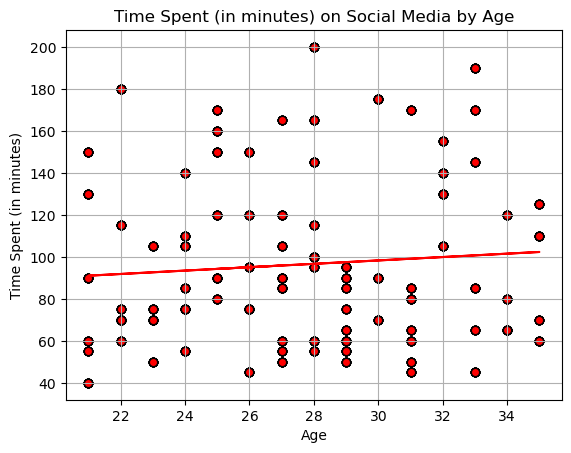

In [17]:
#Create a scatter chart to display time spent on social media by age
x = data['Age']
y = data['Daily_Usage_Time (minutes)']
plt.scatter(x,y,color='red',marker= 'o',edgecolors='black')
plt.xlabel('Age')
plt.ylabel('Time Spent (in minutes)')
plt.title('Time Spent (in minutes) on Social Media by Age')
#Generate a regression analysis and plot the best fit line for the graph
(slope,intercept,rvalue,pvalue,std) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.grid(True)
plt.savefig("../Images/Exhibits-Cindy/age_time_scatter.png")

In [22]:
#Run a correlation on age and time spent using pearson r
correlation = st.pearsonr(x,y)
correlation

PearsonRResult(statistic=0.08103752169850877, pvalue=0.013737831278319346)

The average age Daily Time Spent on social media is: 96.30952380952381
The most middle amount of time users spend: 85.0
The most common amount of time users spend: 0    60
1    70
2    75
3    90
Name: Daily_Usage_Time (minutes), dtype: int64
The least amount of time spent: 40
The most amount of time spent: 200
39.22827429289166
1538.8575039983446
The lower quartile of Time Spent is: 65.0
The upper quartile of Time Spent is: 120.0
The interquartile range of Time Spent is: 55.0
The median of Time Spent is: 85.0 
Time Spent below -17.5 could be outliers.
Time Spent above 202.5 could be outliers.


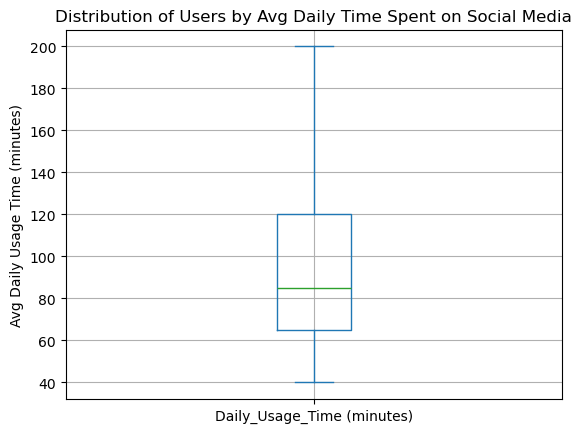

In [21]:
#Create a box plot showing the distribution of the users by average time on social media
data['Daily_Usage_Time (minutes)'].plot(kind='box')
plt.ylabel('Avg Daily Usage Time (minutes)')
plt.title('Distribution of Users by Avg Daily Time Spent on Social Media')
plt.grid(True)
plt.savefig("../Images/Exhibits-Cindy/time_box.png")
#Generate summary statistics of the age distribution
time_mean = data['Daily_Usage_Time (minutes)'].mean()
time_median = data['Daily_Usage_Time (minutes)'].median()
time_mode = data['Daily_Usage_Time (minutes)'].mode()
time_min = data['Daily_Usage_Time (minutes)'].min()
time_max = data['Daily_Usage_Time (minutes)'].max()
time_var = data['Daily_Usage_Time (minutes)'].var()
time_std = data['Daily_Usage_Time (minutes)'].std()

print(f'The average age Daily Time Spent on social media is: {time_mean}')
print(f'The most middle amount of time users spend: {time_median}')
print(f'The most common amount of time users spend: {time_mode}')
print(f"The least amount of time spent: {time_min}")
print(f"The most amount of time spent: {time_max}")
print(time_std)
print(time_var)

quartiles = data['Daily_Usage_Time (minutes)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Time Spent is: {lowerq}")
print(f"The upper quartile of Time Spent is: {upperq}")
print(f"The interquartile range of Time Spent is: {iqr}")
print(f"The median of Time Spent is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Time Spent below {lower_bound} could be outliers.")
print(f"Time Spent above {upper_bound} could be outliers.")

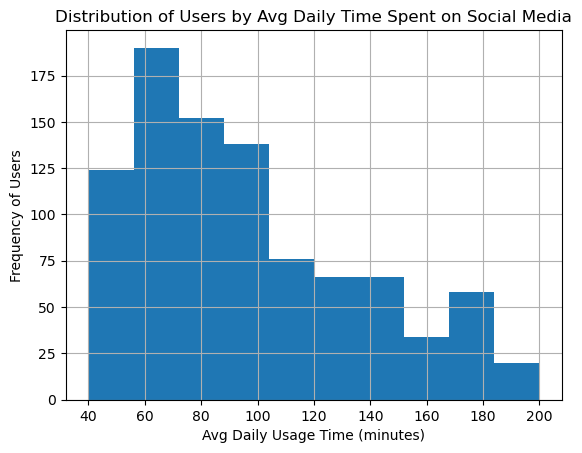

In [20]:
plt.hist(data['Daily_Usage_Time (minutes)'])
plt.xlabel('Avg Daily Usage Time (minutes)')
plt.ylabel('Frequency of Users')
plt.title('Distribution of Users by Avg Daily Time Spent on Social Media')
plt.grid(True)
plt.savefig("../Images/Exhibits-Cindy/time_histogram.png")

The remaining cells are supplemental information: Analysis over Gender and Posts, Likes, Comments and Messages

In [87]:
#Group the data by gender and run an average on the averages of posts per day
gender_posts = data.groupby('Gender')['Posts_Per_Day'].mean()
print(gender_posts)



Gender
Female        4.055233
Male          3.385542
Non-binary    2.322581
Name: Posts_Per_Day, dtype: float64


In [86]:
#Group the data by gender and run an average on the averages of likes received per day
gender_likes = data.groupby('Gender')['Likes_Received_Per_Day'].mean()
print(gender_likes)



Gender
Female        51.598837
Male          40.680723
Non-binary    23.919355
Name: Likes_Received_Per_Day, dtype: float64


In [85]:
#Group the data by gender and run an average on the averages of comments received per day
gender_comments = data.groupby('Gender')['Comments_Received_Per_Day'].mean()
print(gender_comments)



Gender
Female        18.834302
Male          16.560241
Non-binary    10.298387
Name: Comments_Received_Per_Day, dtype: float64


In [84]:
#Group the data by gender and run an average on the averages of messages sent per day
gender_msg = data.groupby('Gender')['Messages_Sent_Per_Day'].mean()
print(gender_msg)



Gender
Female        25.328488
Male          23.256024
Non-binary    17.919355
Name: Messages_Sent_Per_Day, dtype: float64


Analysis over Age and Post, Likes, Comments, and Messages

In [24]:
#Group the data by age and run an average on the averages of posts per day
age_posts = data.groupby('Age')['Posts_Per_Day'].mean()
print(age_posts)
print(f'Highest Average is {age_posts.max()}')



Age
21    3.232143
22    2.824324
23    2.583333
24    3.437500
25    5.187500
26    2.696970
27    2.956522
28    4.195652
29    2.133333
30    4.562500
31    2.612903
32    5.184211
33    4.285714
34    2.388889
35    2.552632
Name: Posts_Per_Day, dtype: float64
Highest Average is 5.1875


In [83]:
#Group the data by age and run an average on the averages of likes received per day
age_likes = data.groupby('Age')['Likes_Received_Per_Day'].mean()
print(age_likes)
print(f'Highest Average is {age_likes.max()}')



Age
21    41.500000
22    38.324324
23    26.500000
24    34.281250
25    59.468750
26    34.454545
27    35.630435
28    48.717391
29    23.155556
30    53.583333
31    32.532258
32    70.447368
33    54.339286
34    26.222222
35    36.447368
Name: Likes_Received_Per_Day, dtype: float64
Highest Average is 70.44736842105263


In [82]:
#Group the data by age and run an average on the averages of comments received per day
age_comments = data.groupby('Age')['Comments_Received_Per_Day'].mean()
print(age_comments)
print(f'Highest Average is {age_comments.max()}')


Age
21    13.160714
22    14.000000
23    11.979167
24    16.125000
25    20.093750
26    13.787879
27    14.500000
28    19.869565
29     9.533333
30    22.166667
31    13.419355
32    25.868421
33    19.642857
34    10.111111
35    15.578947
Name: Comments_Received_Per_Day, dtype: float64
Highest Average is 25.86842105263158


In [81]:
#Group the data by age and run an average on the averages of messages sent per day
age_messages = data.groupby('Age')['Messages_Sent_Per_Day'].mean()
print(age_messages)
print(f'Highest Average is {age_messages.max()}')


Age
21    19.410714
22    22.283784
23    18.104167
24    20.937500
25    27.390625
26    20.606061
27    19.913043
28    27.445652
29    18.933333
30    27.333333
31    21.145161
32    30.710526
33    27.982143
34    18.055556
35    19.789474
Name: Messages_Sent_Per_Day, dtype: float64
Highest Average is 30.710526315789473


Analysis over Gender and Time Spent

In [77]:
#Group the data by gender and calculate the usage time 
gender_usage = data.groupby('Gender')['Daily_Usage_Time (minutes)'].mean()
print(gender_usage)


Gender
Female        112.267442
Male           94.819277
Non-binary     76.169355
Name: Daily_Usage_Time (minutes), dtype: float64


In [78]:
# Calculate what the average overall usage time is 
overall_avg_time = data['Daily_Usage_Time (minutes)'].mean()
overall_avg_time

96.30952380952381

Male Analysis

In [73]:
# Filtering for male entries using numeric index
# First, find the index of male entries
m_data = data.index[data['Gender'] == 'Male'].tolist()
# Now, use iloc to get the rows corresponding to those indices
male_data = data.iloc[m_data]
male_data

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
1,2,30,Male,Twitter,90,5,20,25,30,Anger
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom
5,6,21,Male,Instagram,150,4,60,15,25,Happiness
9,10,31,Male,Instagram,170,5,80,20,35,Happiness
12,13,34,Male,LinkedIn,65,1,12,4,15,Boredom
...,...,...,...,...,...,...,...,...,...,...
910,987,31,Male,Telegram,85,3,45,20,28,Sadness
913,990,30,Male,Twitter,70,2,30,12,20,Anxiety
916,993,24,Male,Telegram,75,3,37,16,22,Neutral
918,995,26,Male,Instagram,150,5,70,25,30,Anxiety


In [78]:
m_data_1 = male_data.groupby('Age')['Posts_Per_Day'].mean()
m_data_1


Age
21    4.900000
22    1.000000
23    3.000000
24    3.000000
25    4.333333
26    3.071429
27    3.409091
28    6.000000
29    2.666667
30    4.275000
31    2.703704
32    5.000000
33    1.000000
34    1.000000
35    2.111111
Name: Posts_Per_Day, dtype: float64

In [86]:
m_data_2 = male_data.groupby('Age')['Likes_Received_Per_Day'].mean()
m_data_2

Age
21    64.500000
22    21.750000
23    21.750000
24    36.600000
25    31.083333
26    41.892857
27    45.022727
28    68.071429
29    30.633333
30    49.950000
31    33.388889
32    79.000000
33     9.500000
34    13.800000
35    33.222222
Name: Likes_Received_Per_Day, dtype: float64

In [88]:
m_data_3 = male_data.groupby('Age')['Comments_Received_Per_Day'].mean()
m_data_3

Age
21    24.000000
22     6.750000
23     9.750000
24    15.700000
25    12.458333
26    16.964286
27    17.318182
28    27.214286
29    13.400000
30    20.775000
31    13.962963
32    27.100000
33     4.700000
34     5.800000
35    17.111111
Name: Comments_Received_Per_Day, dtype: float64

In [90]:
m_data_4 = male_data.groupby('Age')['Messages_Sent_Per_Day'].mean()
m_data_4

Age
21    29.500000
22    22.000000
23    18.000000
24    22.000000
25    24.333333
26    22.928571
27    23.727273
28    32.821429
29    19.666667
30    26.200000
31    21.314815
32    31.000000
33    11.800000
34    15.000000
35    18.333333
Name: Messages_Sent_Per_Day, dtype: float64

In [36]:
# Gather statistical information over the male population as a whole (total posts per day, total likes received per day, comments received per day, messages sent per day )
m_posts = male_data['Posts_Per_Day'].describe()
m_likes = male_data['Likes_Received_Per_Day'].describe()
m_comments = male_data['Comments_Received_Per_Day'].describe()
m_messsages = male_data['Messages_Sent_Per_Day'].describe()

m_posts_median = male_data['Posts_Per_Day'].median()
m_likes_median = male_data['Likes_Received_Per_Day'].median()
m_comments_median = male_data['Comments_Received_Per_Day'].median()
m_messsages_median = male_data['Messages_Sent_Per_Day'].median()

m_posts_mode = male_data['Posts_Per_Day'].mode()
m_likes_mode = male_data['Likes_Received_Per_Day'].mode()
m_comments_mode = male_data['Comments_Received_Per_Day'].mode()
m_messsages_mode = male_data['Messages_Sent_Per_Day'].mode()

Female Analysis 

In [41]:
# Filtering for female entries using numeric index
# First, find the index of female entries
f_data = data.index[data['Gender'] == 'Female'].tolist()
# Now, use iloc to get the rows corresponding to those indices
female_data = data.iloc[f_data]
female_data

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
6,7,27,Female,Twitter,85,3,30,10,18,Anger
8,9,29,Female,LinkedIn,55,2,10,3,8,Neutral
10,11,23,Female,Twitter,75,4,35,7,20,Anxiety
...,...,...,...,...,...,...,...,...,...,...
912,989,25,Female,Instagram,170,6,83,30,33,Happiness
915,992,32,Female,Whatsapp,105,4,55,25,25,Anger
917,994,29,Female,Snapchat,95,2,23,10,28,Sadness
920,997,22,Female,Facebook,70,1,14,6,10,Neutral


In [92]:
f_data_1 = female_data.groupby('Age')['Posts_Per_Day'].mean()
f_data_4

Age
21    4.500000
22    3.437500
23    4.000000
24    3.692308
25    5.700000
26    4.000000
27    3.642857
28    4.277778
29    2.000000
30    6.000000
31    2.000000
32    5.250000
33    5.666667
34    3.333333
35    2.950000
Name: Posts_Per_Day, dtype: float64

In [93]:
f_data_2 = female_data.groupby('Age')['Likes_Received_Per_Day'].mean()
f_data_2

Age
21    65.450000
22    47.958333
23    44.000000
24    43.000000
25    76.500000
26    54.375000
27    38.642857
28    52.250000
29    20.000000
30    71.750000
31    26.750000
32    67.392857
33    81.111111
34    35.611111
35    39.350000
Name: Likes_Received_Per_Day, dtype: float64

In [95]:
f_data_3 = female_data.groupby('Age')['Comments_Received_Per_Day'].mean()
f_data_3

Age
21    17.550000
22    17.187500
23    18.700000
24    19.500000
25    24.675000
26    17.625000
27    17.392857
28    20.333333
29     8.500000
30    29.125000
31     9.750000
32    25.428571
33    26.333333
34    13.500000
35    14.200000
Name: Comments_Received_Per_Day, dtype: float64

In [102]:
f_data_4 = female_data.groupby('Age')['Messages_Sent_Per_Day'].mean()
f_data_4

Age
21    24.100000
22    24.125000
23    24.500000
24    23.807692
25    29.225000
26    30.000000
27    20.642857
28    26.750000
29    19.785714
30    33.000000
31    20.000000
32    30.607143
33    36.777778
34    18.888889
35    21.100000
Name: Messages_Sent_Per_Day, dtype: float64

In [42]:
# Gather statistical information over the famale population as a whole (total posts per day, total likes received per day, comments received per day, messages sent per day )
f_posts = female_data['Posts_Per_Day'].describe()
f_likes = female_data['Likes_Received_Per_Day'].describe()
f_comments = female_data['Comments_Received_Per_Day'].describe()
f_messsages = female_data['Messages_Sent_Per_Day'].describe()

f_posts_median = female_data['Posts_Per_Day'].median()
f_likes_median = female_data['Likes_Received_Per_Day'].median()
f_comments_median = female_data['Comments_Received_Per_Day'].median()
f_messsages_median = female_data['Messages_Sent_Per_Day'].median()

f_posts_mode = female_data['Posts_Per_Day'].mode()
f_likes_mode = female_data['Likes_Received_Per_Day'].mode()
f_comments_mode = female_data['Comments_Received_Per_Day'].mode()
f_messsages_mode = female_data['Messages_Sent_Per_Day'].mode()

Non-Binary Analysis

In [47]:
# Filtering for Non-binary entries using numeric index
# First, find the index of male entries
nb_data = data.index[data['Gender'] == 'Non-binary'].tolist()
# Now, use iloc to get the rows corresponding to those indices
nb_data = data.iloc[nb_data]
nb_data

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
7,8,24,Non-binary,Facebook,110,6,25,12,22,Sadness
11,12,26,Non-binary,Facebook,95,3,20,10,18,Sadness
15,16,21,Non-binary,Facebook,40,1,5,2,10,Neutral
18,19,23,Non-binary,LinkedIn,50,1,8,3,12,Neutral
...,...,...,...,...,...,...,...,...,...,...
908,985,29,Non-binary,Facebook,75,2,20,8,20,Boredom
911,988,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
914,991,27,Non-binary,Facebook,50,1,10,4,10,Boredom
919,996,33,Non-binary,Twitter,85,4,35,18,18,Boredom


In [48]:
# Gather statistical information over the famale population as a whole (total posts per day, total likes received per day, comments received per day, messages sent per day )
nb_posts = nb_data['Posts_Per_Day'].describe()
nb_likes = nb_data['Likes_Received_Per_Day'].describe()
nb_comments = nb_data['Comments_Received_Per_Day'].describe()
nb_messsages = nb_data['Messages_Sent_Per_Day'].describe()

nb_posts_median = nb_data['Posts_Per_Day'].median()
nb_likes_median = nb_data['Likes_Received_Per_Day'].median()
nb_comments_median = nb_data['Comments_Received_Per_Day'].median()
nb_messsages_median = nb_data['Messages_Sent_Per_Day'].median()

nb_posts_mode = nb_data['Posts_Per_Day'].mode()
nb_likes_mode = nb_data['Likes_Received_Per_Day'].mode()
nb_comments_mode = nb_data['Comments_Received_Per_Day'].mode()
nb_messsages_mode = nb_data['Messages_Sent_Per_Day'].mode()

Text(0.5, 1.0, 'Posts per day vs Age for Non-binary')

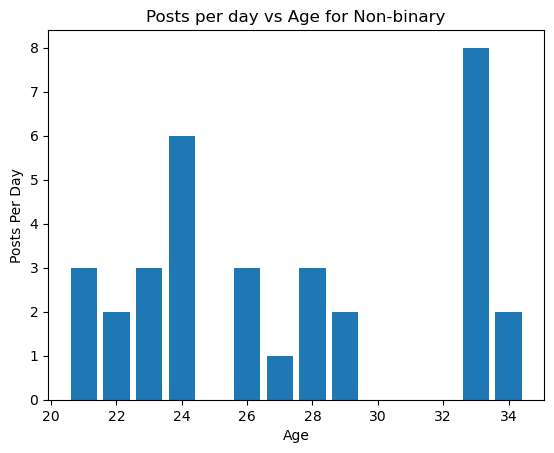

In [49]:
# Plot data using a bar graph comparing the average Posts per day by age.
plt.bar(nb_data['Age'],nb_data['Posts_Per_Day'])
plt.xlabel('Age')
plt.ylabel('Posts Per Day')
plt.title('Posts per day vs Age for Non-binary')

In [53]:
nb_data.groupby('Age')['Posts_Per_Day'].mean()

Age
21    1.615385
22    2.000000
23    2.000000
24    3.357143
26    2.000000
27    1.000000
28    2.285714
29    1.750000
33    4.571429
34    2.000000
Name: Posts_Per_Day, dtype: float64

Text(0.5, 1.0, 'Likes received per day vs Age for Non-binary')

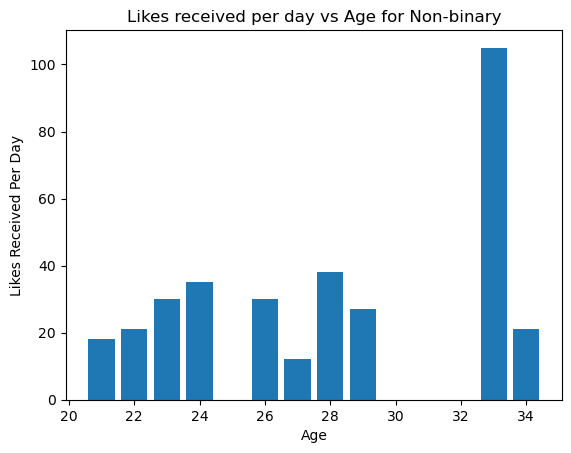

In [27]:
# Plot data using a bar graph comparing the average Likes received per day by age.
plt.bar(nb_data['Age'],nb_data['Likes_Received_Per_Day'])
plt.xlabel('Age')
plt.ylabel('Likes Received Per Day')
plt.title('Likes received per day vs Age for Non-binary')

Text(0.5, 1.0, 'Comments received per day vs Age for Non-binary')

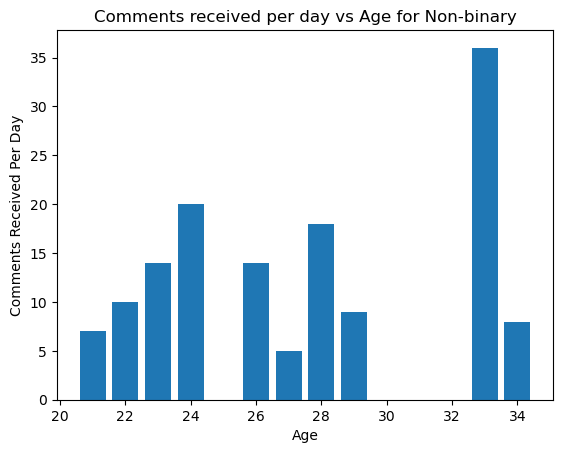

In [28]:
# Plot data using a bar graph comparing the average comments received per day by age.
plt.bar(nb_data['Age'],nb_data['Comments_Received_Per_Day'])
plt.xlabel('Age')
plt.ylabel('Comments Received Per Day')
plt.title('Comments received per day vs Age for Non-binary')

Text(0.5, 1.0, 'Messages sent per day vs Age for Non-binary')

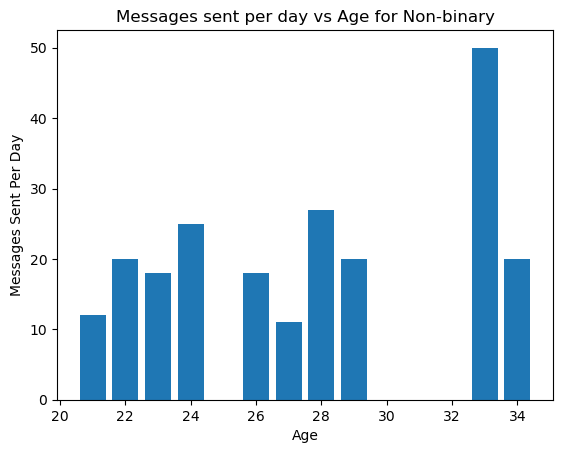

In [32]:
# Plot data using a bar graph comparing the average messages sent per day by age.
plt.bar(nb_data['Age'],nb_data['Messages_Sent_Per_Day'])
plt.xlabel('Age')
plt.ylabel('Messages Sent Per Day')
plt.title('Messages sent per day vs Age for Non-binary')

<Figure size 640x480 with 0 Axes>